# ***Python | Customer Churn Analysis Prediction***

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import ipywidgets as widgets
from IPython.display import display

In [5]:
# Load the dataset from a valid public URL
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
data = pd.read_csv(url)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Convert 'TotalCharges' to a numeric type, setting errors='coerce' to handle non-numeric values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

<ipython-input-7-e213b6a96bce>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [8]:
# Drop irrelevant columns
data = data.drop(['customerID'], axis=1)

In [9]:
# Convert categorical variables to dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

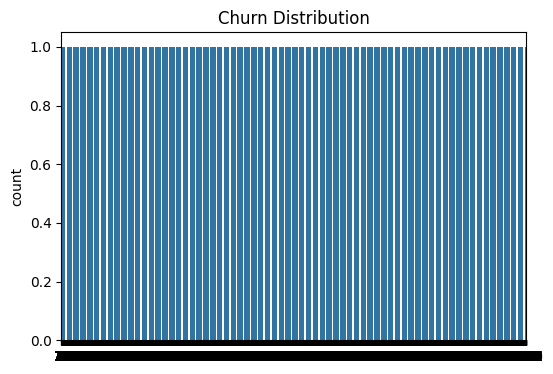

In [10]:
# Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['Churn_Yes'])
plt.title("Churn Distribution")
plt.show()

In [11]:
# Separate features and target variable
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Import the necessary library
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import classification_report

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7899219304471257
Confusion Matrix:
 [[942  94]
 [202 171]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1036
        True       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



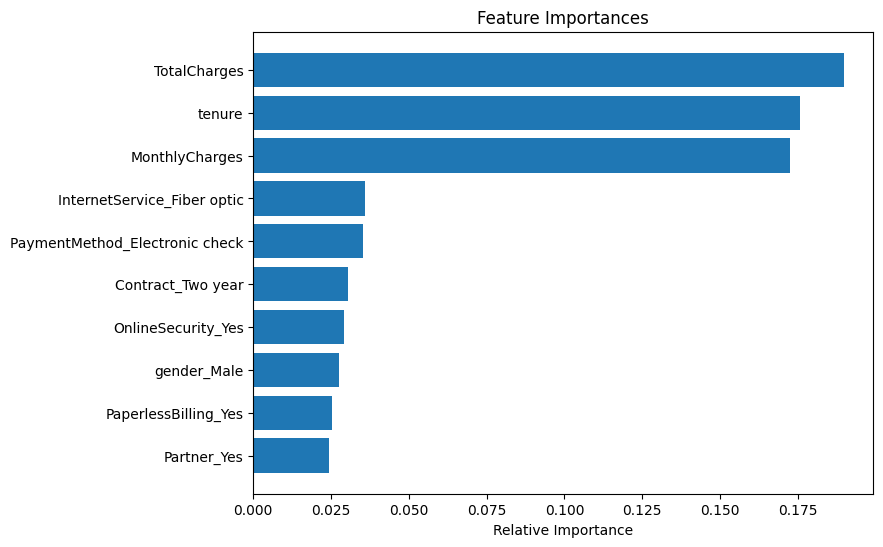

In [15]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-10:]  # top 10 features

plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Print prediction probabilities instead of just the final prediction
def predict_churn(tenure, MonthlyCharges, TotalCharges, Contract, PaymentMethod):
    user_data = {
        'tenure': [tenure],
        'MonthlyCharges': [MonthlyCharges],
        'TotalCharges': [TotalCharges],
        'Contract_Month-to-month': [1 if Contract == 'Month-to-month' else 0],
        'Contract_One year': [1 if Contract == 'One year' else 0],
        'Contract_Two year': [1 if Contract == 'Two year' else 0],
        'PaymentMethod_Bank transfer (automatic)': [1 if PaymentMethod == 'Bank transfer (automatic)' else 0],
        'PaymentMethod_Credit card (automatic)': [1 if PaymentMethod == 'Credit card (automatic)' else 0],
        'PaymentMethod_Electronic check': [1 if PaymentMethod == 'Electronic check' else 0],
        'PaymentMethod_Mailed check': [1 if PaymentMethod == 'Mailed check' else 0],
    }

    user_df = pd.DataFrame(user_data)

    # Ensure the test data has the same columns as the training data
    for col in X.columns:
        if col not in user_df.columns:
            user_df[col] = 0
    user_df = user_df[X.columns]

    user_df_scaled = scaler.transform(user_df)

    # Check prediction probabilities
    prediction_probabilities = model.predict_proba(user_df_scaled)
    print("Prediction Probabilities:", prediction_probabilities)

    # Apply threshold to decide churn or not based on probability
    prediction = (prediction_probabilities[0][1] >= 0.5).astype(int)
    return prediction

In [17]:
# Display graphs to provide context
def display_context_graphs(tenure, MonthlyCharges):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Tenure distribution plot
    sns.histplot(data, x="tenure", hue="Churn_Yes", multiple="stack", ax=axs[0], palette="coolwarm")
    axs[0].axvline(tenure, color="lime", linestyle="--", linewidth=2, label=f"Selected tenure: {tenure}")
    axs[0].set_title("Tenure Distribution by Churn", fontsize=14, fontweight='bold')
    axs[0].legend()

    # Monthly Charges distribution plot
    sns.histplot(data, x="MonthlyCharges", hue="Churn_Yes", multiple="stack", ax=axs[1], palette="coolwarm")
    axs[1].axvline(MonthlyCharges, color="lime", linestyle="--", linewidth=2, label=f"Selected Charges: ${MonthlyCharges}")
    axs[1].set_title("Monthly Charges Distribution by Churn", fontsize=14, fontweight='bold')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [18]:
# Create the interactive GUI
def on_button_clicked(b):
    with output:
        clear_output()

        result = predict_churn(
            tenure_slider.value,
            monthly_charges_slider.value,
            total_charges_slider.value,
            contract_dropdown.value,
            payment_method_dropdown.value
        )

        # Display result with neon color, larger font, centered alignment
        if result == 1:
            prediction_text = "<div style='color:#39ff14; font-size:28px; font-weight:bold; text-align:center;'>This customer is likely to churn.</div>"
        else:
            prediction_text = "<div style='color:#39ff14; font-size:28px; font-weight:bold; text-align:center;'>This customer is not likely to churn.</div>"

        # Display the prediction label in neon green color
        display(HTML(prediction_text))

        # Display context graphs for additional insights in center
        with output:
            display_context_graphs(tenure_slider.value, monthly_charges_slider.value)

# Title and signature with enhanced style
title = widgets.HTML("<h1 style='color:#4A90E2; text-align:center; font-size:36px; font-weight:bold;'>Customer Churn Prediction</h1>")
signature = widgets.HTML("<p style='text-align:center; font-style:italic; color:gray;'>Created by AI Innovators</p>")

# Interactive elements with enhanced styling and layout
tenure_slider = widgets.IntSlider(
    min=0, max=72, description="Tenure", style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%', height='40px')
)
monthly_charges_slider = widgets.FloatSlider(
    min=10, max=200, description="Monthly Charges", style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%', height='40px')
)
total_charges_slider = widgets.FloatSlider(
    min=10, max=10000, description="Total Charges", style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%', height='40px')
)
contract_dropdown = widgets.Dropdown(
    options=['Month-to-month', 'One year', 'Two year'], description="Contract",
    style={'description_width': 'initial'}, layout=widgets.Layout(width='80%', height='40px')
)
payment_method_dropdown = widgets.Dropdown(
    options=['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'],
    description="Payment Method", style={'description_width': 'initial'}, layout=widgets.Layout(width='80%', height='40px')
)
output = widgets.Output(layout={'border': '1px solid black', 'padding': '10px'})

# Button with larger and more stylish layout
button = widgets.Button(
    description="Predict Churn", button_style='success',
    layout=widgets.Layout(width='80%', height='50px'),
    style={'font_weight': 'bold', 'font_size': '18px'}
)
button.on_click(on_button_clicked)

# Center the layout
centered_layout = widgets.VBox([
    title,
    widgets.VBox([tenure_slider, monthly_charges_slider, total_charges_slider, contract_dropdown, payment_method_dropdown, button],
                 layout=widgets.Layout(align_items='center', width='100%')),
    output,
    signature
])

# Display the final UI
display(centered_layout)

# **HAPPY COADING**